In [1]:
import os
import pandas as pd
import numpy as np

from src.utils.general import get_db_conn

In [2]:
creds_folder = '../conf/local/'
fpath = os.path.join(creds_folder, 'credentials.yaml')
db_con = get_db_conn(fpath)

In [27]:
q = """
        with tot_bills as(
            select 
                count(*) as tot_bills, state_id 
            from raw.bills join raw.sessions using (session_id) group by state_id order by state_id::int
        ),
        passed as (
            select 
                count(*) as passed_bills, state_id 
            from raw.bill_progress join raw.bills using(bill_id) join raw.sessions using(session_id)
            where event='4' group by state_id order by state_id::int
        )
        select 
            state_id::int,
            tot_bills,
            passed_bills,
            (passed_bills::float/tot_bills) * 100 as passed_frac
        from tot_bills join passed using (state_id)
    """

df = pd.read_sql(q, db_con)

In [28]:
q = """select * from catalogs.states"""
states = pd.read_sql(q, db_con)

In [29]:
df = df.sort_values('passed_frac', ascending=False)
# df.head()

In [32]:
df_merged = df.merge(states, on='state_id', how='inner')

In [33]:
df_merged

,state_id,tot_bills,passed_bills,passed_frac,state_abbreviation,state
0,10,30004,20237,67.447674,GA,georgia
1,18,16835,10354,61.502822,LA,louisiana
2,4,9973,5934,59.500652,AR,arkansas
3,34,5723,3340,58.360999,ND,north dakota
4,12,6166,3520,57.087253,ID,idaho
5,35,12849,7173,55.825356,OH,ohio
6,6,7334,3993,54.445050,CO,colorado
7,44,7164,3787,52.861530,UT,utah
8,41,4683,2460,52.530429,SD,south dakota
9,46,32226,16901,52.445231,VA,virginia


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

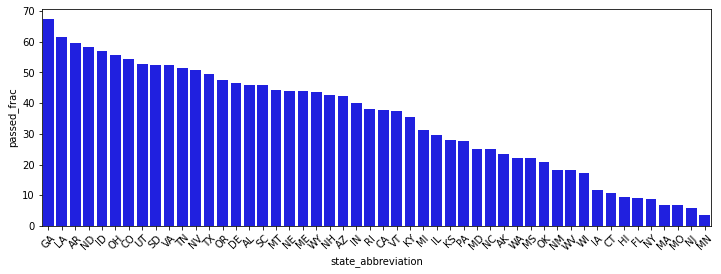

In [37]:
fig, ax = plt.subplots()
fig.set_size_inches(12,4)
sns.barplot(x='state_abbreviation', y='passed_frac', data=df_merged, color='b', ax=ax)
plt.xticks(rotation=45)

### 

In [38]:
df_merged.head()

,state_id,tot_bills,passed_bills,passed_frac,state_abbreviation,state
0,10,30004,20237,67.447674,GA,georgia
1,18,16835,10354,61.502822,LA,louisiana
2,4,9973,5934,59.500652,AR,arkansas
3,34,5723,3340,58.360999,ND,north dakota
4,12,6166,3520,57.087253,ID,idaho


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

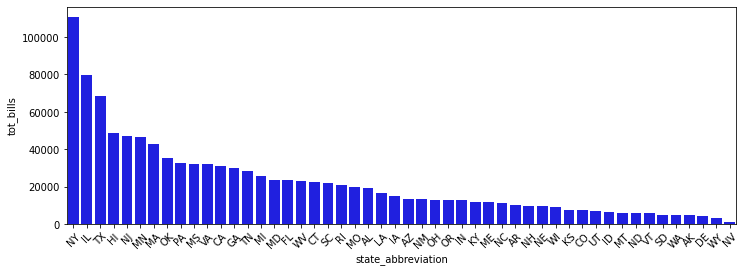

In [42]:
df_merged = df_merged.sort_values('tot_bills', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(12,4)
sns.barplot(x='state_abbreviation', y='tot_bills', data=df_merged, color='b', ax=ax)
plt.xticks(rotation=45)

In [41]:
df_merged

,state_id,tot_bills,passed_bills,passed_frac,state_abbreviation,state
45,32,110830,9829,8.868537,NY,new york
29,13,79829,23558,29.510579,IL,illinois
12,43,68580,34001,49.578594,TX,texas
43,11,48463,4509,9.304005,HI,hawaii
48,30,47002,2806,5.969959,NJ,new jersey
49,23,46563,1705,3.661706,MN,minnesota
46,21,42905,2975,6.933924,MA,massachusetss
37,36,35313,7307,20.692096,OK,oklahoma
31,38,32667,9038,27.667065,PA,pennsylvania
36,24,32268,7097,21.993926,MS,mississippi


### Days to pass

In [75]:
q = """
    select 
        bill_id,
        bill_type,
        intro_date,
        extract(year from intro_date) as bill_year,
        passed_date,
        (passed_date::DATE - intro_date::DATE) as days_to_pass
    from (
        select 
            bill_id,
            max(bill_type) as bill_type,
            max(case when event='1' then progress_date end) as intro_date,
            max(case when event='4' then progress_date end) as passed_date
        from raw.bill_progress left join raw.bills using(bill_id)
        group by bill_id
    ) as t 
"""
time_gap = pd.read_sql(q, db_con)

In [76]:
msk = time_gap['days_to_pass'].isnull()
b_msk = time_gap['bill_type'] == 'B'

In [77]:
t = time_gap[~msk]
t2 = t[b_msk]

/home/kasun/.pyenv/versions/aclu/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [78]:
t2.head()

,bill_id,bill_type,intro_date,bill_year,passed_date,days_to_pass
3,1000003,B,2017-03-30,2017.0,2017-05-31,62.0
5,1000006,B,2017-03-28,2017.0,2017-10-17,203.0
6,1000007,B,2017-03-28,2017.0,2017-06-14,78.0
9,1000010,B,2017-03-28,2017.0,2017-03-30,2.0
14,1000016,B,2017-03-28,2017.0,2017-06-30,94.0


(0.0, 1000.0)

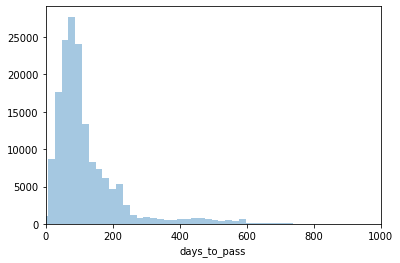

In [79]:
ax = sns.distplot(t2['days_to_pass'], kde=False, bins=200)
ax.set_xlim(0, 1000)

In [73]:
t2['days_to_pass'].std()

107.31474649867211

In [74]:
t[['bill_type', 'days_to_pass']].groupby('bill_type').mean()

,days_to_pass
bill_type,
B,120.466819
CA,160.692308
CL,161.640000
CM,63.884615
CR,33.044614
JM,41.443478
JR,28.844921
JRCA,114.333333
M,13.405620


In [82]:
bill_type_year = t[['bill_type', 'bill_year', 'days_to_pass']].groupby(['bill_type', 'bill_year']).mean()

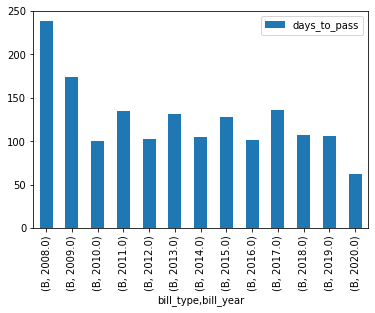

In [101]:
bill_type_year.head(13).plot(kind='bar')

### Time analysis 

In [88]:
time_gap.head()

,bill_id,bill_type,intro_date,bill_year,passed_date,days_to_pass
0,1000000,B,2017-03-28,2017.0,None,NaN
1,1000001,B,2017-03-28,2017.0,None,NaN
2,1000002,B,2017-03-28,2017.0,None,NaN
3,1000003,B,2017-03-30,2017.0,2017-05-31,62.0
4,1000004,R,2017-03-28,2017.0,2017-03-28,0.0


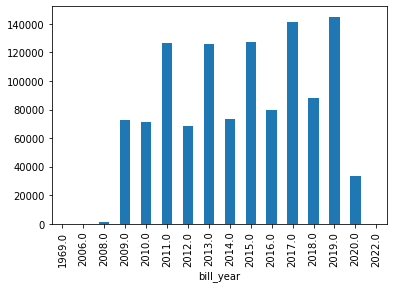

In [89]:
time_gap.groupby('bill_year').count()['bill_type'].plot(kind='bar')

In [97]:
# pd.to_datetime(time_gap['intro_date']).sort_values() > '2009-01-01'

In [98]:
# pd.to_datetime(time_gap['intro_date']).max()